In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import svm
import pylab
import time
import seaborn as sns

In [2]:
df = pd.read_csv('F:\MSFE\IE517 MLF\HW5/hw5_treasury yield curve data.csv')
df=df.dropna(how='any',axis=0)
df=df.iloc[::-1]
df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
8070,1/13/1987,6.2102,6.6709,7.0310,7.3333,7.5890,7.8010,7.9722,8.1067,8.2099,...,8.4822,8.4829,8.4834,8.4836,8.4838,8.4840,8.4841,8.4841,8.4841,2.942279
8069,1/14/1987,6.2215,6.6978,7.0637,7.3688,7.6270,7.8421,8.0168,8.1551,8.2619,...,8.5503,8.5511,8.5516,8.5519,8.5522,8.5523,8.5524,8.5525,8.5525,2.942279
8068,1/15/1987,6.2195,6.6790,7.0240,7.3172,7.5738,7.7951,7.9805,8.1314,8.2507,...,8.5936,8.5946,8.5953,8.5958,8.5961,8.5963,8.5965,8.5966,8.5966,2.942279
8067,1/16/1987,6.2091,6.6589,6.9843,7.2634,7.5140,7.7355,7.9250,8.0814,8.2067,...,8.5737,8.5748,8.5756,8.5761,8.5764,8.5767,8.5768,8.5769,8.5770,2.942279
8066,1/20/1987,6.1632,6.6192,6.9560,7.2403,7.4888,7.7032,7.8831,8.0295,8.1454,...,8.4777,8.4787,8.4794,8.4799,8.4802,8.4804,8.4805,8.4806,8.4807,2.942279


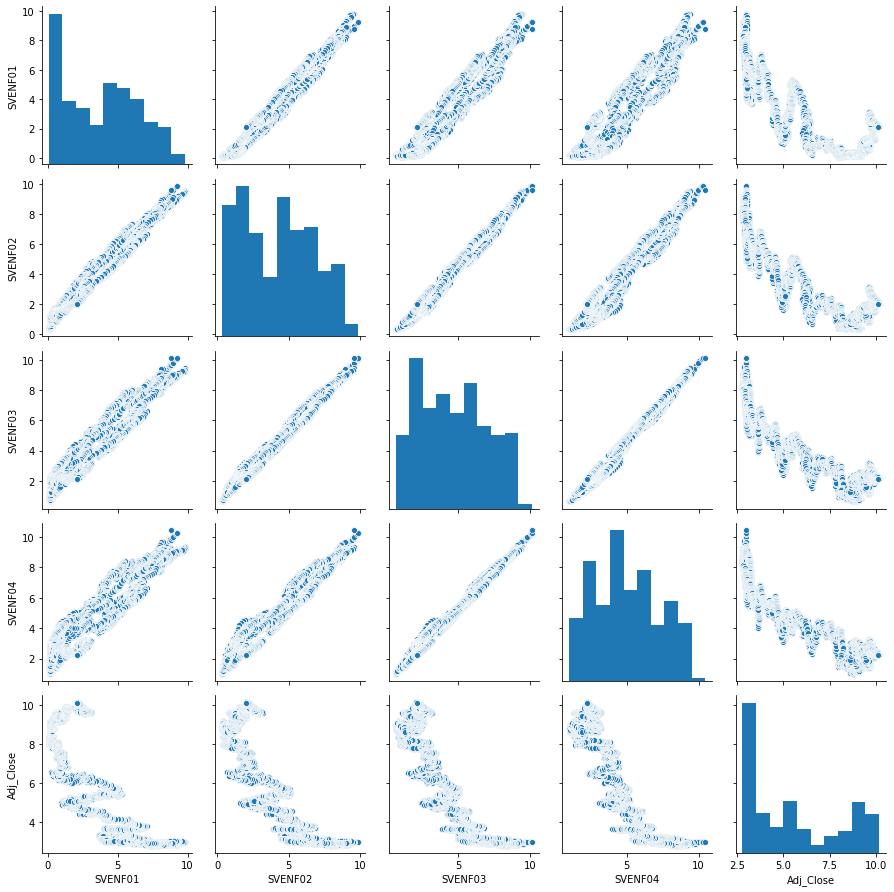

In [3]:
cols = ['SVENF01','SVENF02','SVENF03','SVENF04','Adj_Close']
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.show()

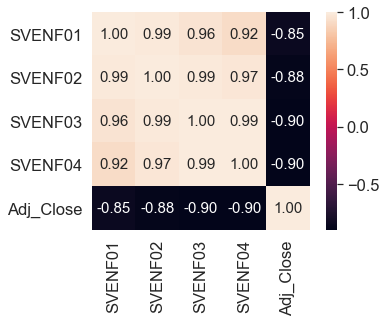

In [4]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', 
                annot_kws = {'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

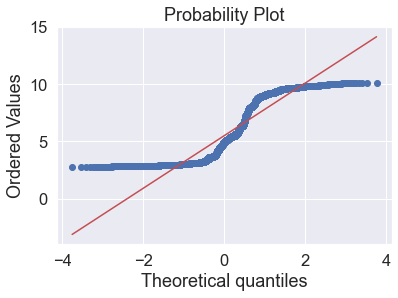

In [5]:
stats.probplot(df['Adj_Close'],dist='norm',plot=pylab)
pylab.show()

In [6]:
# Splitting the data into 85% training and 15% test subsets.
X, y = df.iloc[:, 1:31].values, df.iloc[:,31].values

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.15, random_state=42)

scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler()

X_train_std = scalerX.transform(X_train)
X_test_std = scalerX.transform(X_test)

y_train_std = scalery.fit_transform(y_train.reshape(-1,1))
y_test_std = scalery.transform(y_test.reshape(-1,1))

l=[]
for m in range(0,6860):
    for i in y_train_std[m]:
        l.append(i)
y_train_std=np.array(l)
l=[]
for m in range(0,1211):
    for i in y_test_std[m]:
        l.append(i)
y_test_std=np.array(l)


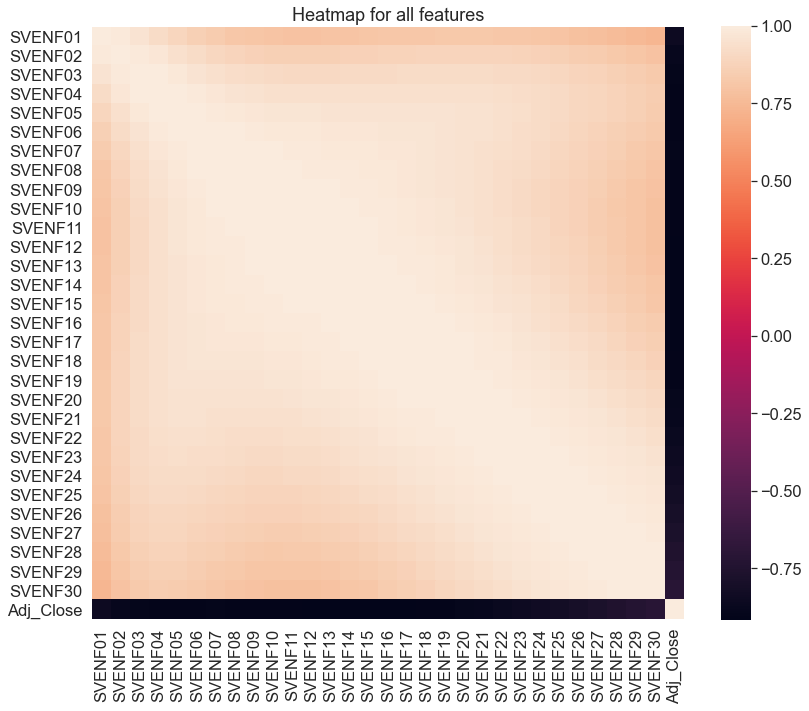

In [7]:
plt.figure(figsize=(12,10))
cm=np.corrcoef(df.iloc[:, 1:32].values.T)
hm = sns.heatmap(cm,cbar=True,square=True,fmt='.2f',annot=False,yticklabels=df.columns[1:32],xticklabels=df.columns[1:32],
                 annot_kws={'size': 15})
plt.tight_layout()
plt.title('Heatmap for all features')
plt.show()

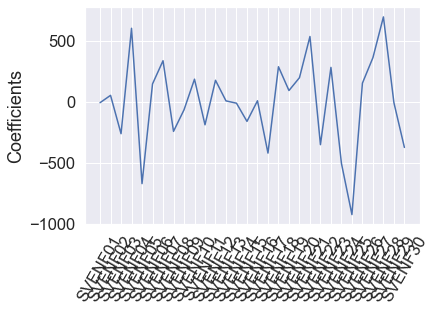

In [30]:
slr=LinearRegression()
x=df.iloc[:, 1:31].columns
slr.fit(X_train, y_train)
slr_coef = slr.fit(X,y).coef_
_=plt.plot(range(len(x)),slr_coef)
_=plt.xticks(range(len(x)),x,rotation=60)
_=plt.ylabel('Coefficients')
plt.show()

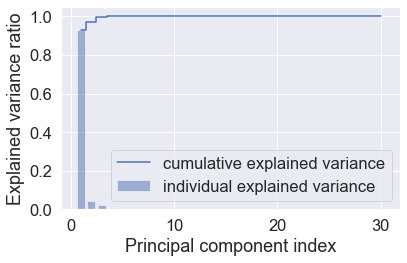

In [31]:
# Eigendecomposition of the covariance matrix.
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)



tot = sum(eigen_vals)
var_exp =[ (i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp =np.array( [(i / tot) for i in sorted(eigen_vals, reverse=True)])

plt.bar(range(1, 31), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 31), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [10]:
#print the cumulative explained variance
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print("The cumulative explained variance of all features:")
print(pca.explained_variance_ratio_)
print("")

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print("The cumulative explained variance of 3 pca features:")
print(pca.explained_variance_ratio_)

The cumulative explained variance of all features:
[ 0.932  0.041  0.022  0.005  0.001  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]

The cumulative explained variance of 3 pca features:
[ 0.932  0.041  0.022]


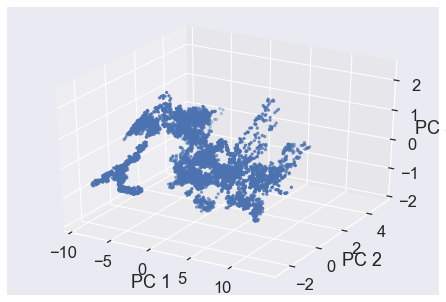

In [11]:
#figure out pc 1 to3
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1],X_train_pca[:, 2],s=5)
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

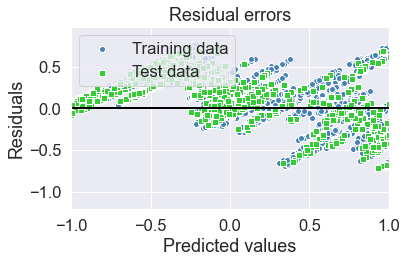

Using time: 0.04356220000045141 s
Slope:  [-0.176 -0.164 -0.094 -0.015  0.040  0.065  0.066  0.051  0.028  0.002
 -0.023 -0.047 -0.067 -0.084 -0.097 -0.106 -0.111 -0.113 -0.110 -0.103
 -0.092 -0.077 -0.058 -0.036 -0.009  0.020  0.052  0.087  0.124  0.162]
Intercept: 0.000
MSE train: 0.111, test: 0.107
R^2 train: 0.889, test: 0.891


In [34]:
#linear regression model
clf=SGDRegressor(penalty=None,random_state=42)
start = time.perf_counter()
clf.fit(X_train_std,y_train_std)
y_train_pred = clf.predict(X_train_std)
y_test_pred = clf.predict(X_test_std)
plt.scatter(y_train_pred,  y_train_pred - y_train_std,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test_std,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
end = time.perf_counter()
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors')
plt.hlines(y=0, xmin=-1, xmax=1, color='black', lw=2)
plt.xlim([-1, 1])
plt.tight_layout()
plt.show()
print ("Using time:",end-start,"s")
#
print('Slope: ' ,end=' ')
clf_coef=clf.coef_
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(clf_coef)
print('Intercept: %.3f' % clf.intercept_)
#

print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train_std, y_train_pred),
    mean_squared_error(y_test_std, y_test_pred)))

#
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train_std, y_train_pred),
    r2_score(y_test_std, y_test_pred)))    



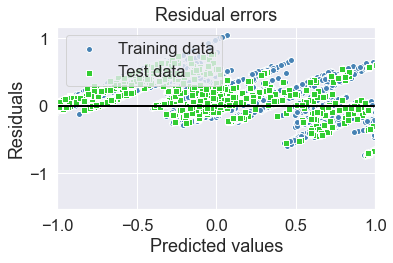

Using time: 12.021348999998736 s
Slope:  [[ 0.331 -0.317 -1.871 -0.041  1.390  1.509  0.761 -0.214 -0.965 -1.308
  -1.243 -0.868 -0.333  0.224  0.690  0.993  1.094  0.998  0.728  0.336
  -0.116 -0.566 -0.944 -1.192 -1.257 -1.097 -0.687 -0.009  0.936  2.146]]
Intercept: -0.002
MSE train: 0.106, test: 0.102
R^2 train: 0.894, test: 0.897


In [35]:
#SVM regressor model 
clf_svr=svm.SVR(kernel="linear")
start = time.perf_counter()
clf_svr.fit(X_train_std,y_train_std)
y_train_pred = clf_svr.predict(X_train_std)
y_test_pred = clf_svr.predict(X_test_std)
plt.scatter(y_train_pred,  y_train_pred - y_train_std,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test_std,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
end = time.perf_counter()
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors')
plt.hlines(y=0, xmin=-1, xmax=1, color='black', lw=2)
plt.xlim([-1, 1])
plt.tight_layout()
plt.show()
print ("Using time:",end-start,"s")
#
print('Slope: ' ,end=' ')
clf_coef=clf_svr.coef_
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(clf_coef)
print('Intercept: %.3f' % clf_svr.intercept_)
#

print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train_std, y_train_pred),
    mean_squared_error(y_test_std, y_test_pred)))

#
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train_std, y_train_pred),
    r2_score(y_test_std, y_test_pred)))    



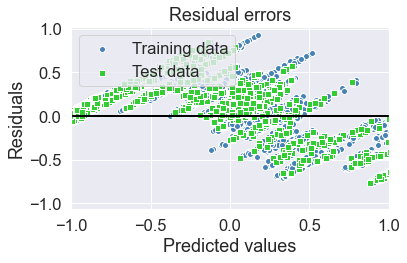

Using time: 0.030442600000242237 s
Slope:  [-0.158 -0.183  0.098]
Intercept: -0.004
MSE train: 0.138, test: 0.137
R^2 train: 0.862, test: 0.861


In [36]:
#linear regression model ( PCA transform)
clf=SGDRegressor(penalty=None,random_state=42)
start = time.perf_counter()
clf.fit(X_train_pca,y_train_std)
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)
plt.scatter(y_train_pred,  y_train_pred - y_train_std,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test_std,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
end = time.perf_counter()
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors')
plt.hlines(y=0, xmin=-1, xmax=1, color='black', lw=2)
plt.xlim([-1, 1])
plt.tight_layout()
plt.show()
print ("Using time:",end-start,"s")
#
print('Slope: ' ,end=' ')
clf_coef=clf.coef_
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(clf_coef)
print('Intercept: %.3f' % clf.intercept_)
#

print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train_std, y_train_pred),
    mean_squared_error(y_test_std, y_test_pred)))

#
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train_std, y_train_pred),
    r2_score(y_test_std, y_test_pred)))    



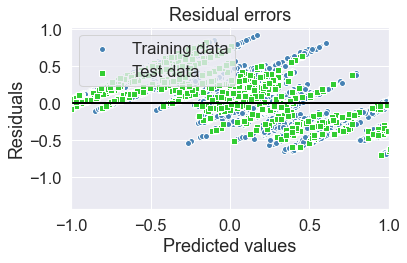

Using time: 10.673240500000247 s
Slope:  [[-0.177 -0.228  0.135]]
Intercept: -0.025
MSE train: 0.137, test: 0.136
R^2 train: 0.863, test: 0.862


In [37]:
#SVM regressor model (PCA transform)
clf_svr=svm.SVR(kernel="linear")
start = time.perf_counter()
clf_svr.fit(X_train_pca,y_train_std)
y_train_pred = clf_svr.predict(X_train_pca)
y_test_pred = clf_svr.predict(X_test_pca)
plt.scatter(y_train_pred,  y_train_pred - y_train_std,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test_std,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
end = time.perf_counter()
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors')
plt.hlines(y=0, xmin=-1, xmax=1, color='black', lw=2)
plt.xlim([-1, 1])
plt.tight_layout()
plt.show()
print ("Using time:",end-start,"s")
#
print('Slope: ' ,end=' ')
clf_coef=clf_svr.coef_
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(clf_coef)
print('Intercept: %.3f' % clf_svr.intercept_)
#

print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train_std, y_train_pred),
    mean_squared_error(y_test_std, y_test_pred)))

#
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train_std, y_train_pred),
    r2_score(y_test_std, y_test_pred)))    



In [29]:
print("My name is Ziheng Wu")
print("My NetID is: zihengw5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Ziheng Wu
My NetID is: zihengw5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
